Importing the MNIST dataset and reshaping the training and test sets

In [15]:
import torch
import numpy as np
from torchvision.datasets import MNIST

mnist_tr = MNIST('~/.torchvision', train=True, download=True)
x_train, y_train = mnist_tr.data.unsqueeze(1).type(torch.FloatTensor)/255, mnist_tr.targets
mnist_ts = MNIST('~/.torchvision', train=False, download=True)
x_test, y_test = mnist_ts.data.unsqueeze(1).type(torch.FloatTensor)/255, mnist_ts.targets

xt = x_train.reshape(60000,784)
xts = x_test.reshape(10000,784)

Importing KNN from Sklearn

In [16]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

Running KNN for different values of K

In [17]:
kVals = range(1, 15)
accuracies = []

for k in range(1, 15):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(xt, y_train)
    
    score = model.score(xts, y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)
    
i = int(np.argmax(accuracies))
print("k=%d achieved highest accuracy of %.2f%% on test data" % (kVals[i],
    accuracies[i] * 100))

k=1, accuracy=96.91%
k=2, accuracy=96.27%
k=3, accuracy=97.05%
k=4, accuracy=96.82%
k=5, accuracy=96.88%
k=6, accuracy=96.77%
k=7, accuracy=96.94%
k=8, accuracy=96.70%
k=9, accuracy=96.59%
k=10, accuracy=96.65%
k=11, accuracy=96.68%
k=12, accuracy=96.61%
k=13, accuracy=96.53%
k=14, accuracy=96.40%
k=3 achieved highest accuracy of 97.05% on test data


Plotting K vs accuracy

<function matplotlib.pyplot.show(close=None, block=None)>

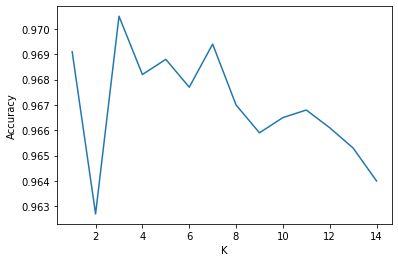

In [18]:
import matplotlib.pyplot as plt

domain = np.linspace(1,14,num=14)

plt.xlabel("K")
plt.ylabel("Accuracy")
plt.plot(domain,accuracies)
plt.show